## Decision Tree lab

#### Data Description

The data used was cleaned. Check the EDA notebook for more details.

Data preprocessing has been done below before the training.

### Notebook Description

This notebook will cover the **Decision Tree** Classification Model.

For this usecase, we will be using the 'award' column to predict whether a player won an award or not.

## Import Libraries

In [191]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

## Load the Data

In [192]:
df = pd.read_csv("final_data_cleaned.csv")

In [193]:
df.shape

(6397, 19)

In [194]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,8,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,10,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


## Preprocess the Data

In [195]:
# creating a list containing the categorical columns names only
cetegorical_feats = df.select_dtypes(include='object').columns.to_list()

In [196]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Cardiff City         26
Portimonense SC      26
Watford FC           26
                     ..
Bayern Munich         2
Gaziantep FK          2
Manchester City       2
FC Barcelona          2
Real Madrid           1
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          667
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Defender                         1
Attack                           1
Name: count, dtype: int64


In [197]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [198]:
# Calculate the frequency of each 'Type'
type_counts = df['position'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['position'].isin(type_counts[type_counts >= 2].index)]

In [199]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Watford FC           26
Blackpool FC         26
Portimonense SC      26
                     ..
Arsenal FC            4
Gaziantep FK          2
Bayern Munich         2
Manchester City       2
FC Barcelona          2
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          666
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Name: count, dtype: int64


In [200]:
df.columns

Index(['Unnamed: 0', 'team', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [201]:
# removing the unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

In [202]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [203]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


In [204]:
cetegorical_feats

['team', 'position']

In [205]:
df.shape

(6394, 18)

In [206]:
# one hot encoding the categorical features
df = pd.get_dummies(df, columns=['team', 'position'], drop_first=True)

In [207]:
df.shape

(6394, 401)

In [208]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False


> Decided to use the Award column this time to predict if a player got a reward or not

> The award column will be transformed into binary, 0 for no award, and 1 for awarded. After testing, this resulted in the best scores

In [209]:
# transform the 'award' column into binary categories
def transform_award_binary(award):
    return 0 if award == 0 else 1

# apply the transformation
df['award_binary'] = df['award'].apply(transform_award_binary)


#### 3. Feature selection

> Will be skipping Feature Selection, but will still check the correlations

> Will probably come back and do it if the evaluation is not at least 2x better than the Base Model

In [210]:
# creating the correlation matrix
correlation = df.corr(numeric_only=True)

In [211]:
# printing the correlations for the column 'award'
print(correlation['award_binary'].sort_values(ascending=False))

award_binary                                1.000000
award                                       0.717270
age                                         0.228378
games_injured                               0.192011
highest_value                               0.185905
                                              ...   
team_Club de Gimnasia y Esgrima La Plata   -0.047446
team_AC Ajaccio                            -0.047950
team_Lamontville Golden Arrows             -0.051272
team_RC Lens                               -0.060232
team_AA Argentinos Juniors                 -0.064093
Name: award_binary, Length: 402, dtype: float64


#### 4. Prepare train and test data

In [212]:
# splitting the data into features and target variable
# X = features
# y = target
# we'll drop the 'award' column and use the transformed 'award_binary' column
X = df.drop(columns=['award', 'award_binary'])
y = df['award_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# printing the shapes of the training and testing sets to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5115, 400), (1279, 400), (5115,), (1279,))

## Buliding the Model

In [213]:
# Build the Decision Tree model
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

## Train the Model

 ### Decision Tree

In [214]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Test the Model

In [215]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluating the Model 

0. Benchmark

In [216]:
# our benchmark model
base_model = round(df['award'].value_counts()[1]/df.shape[0]*100, 2)
base_model

24.82

1. Accuracy

In [217]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.63408913213448

2. Precision

In [218]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.63


3. Recall

In [219]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.63


4. F1 Score

In [220]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.63


5. Confusion Matrix

In [221]:
# the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[311, 234],
       [234, 500]], dtype=int64)

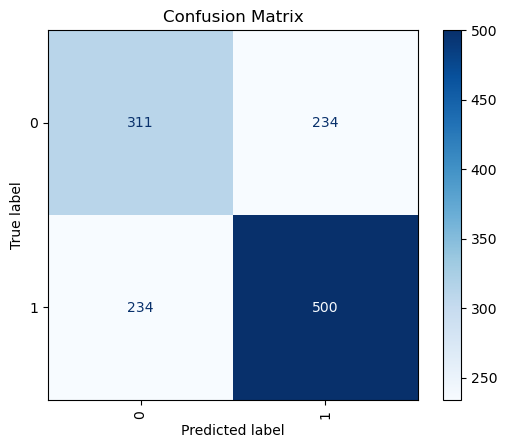

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()